In [1]:
import urllib.request
import pandas as pd

In [3]:
openapc_url = "https://raw.githubusercontent.com/OpenAPC/openapc-de/master/data/fuberlin/APC_FU_Berlin_2015.csv"
apc_file = "openapc.csv"

In [4]:
urllib.request.urlretrieve(openapc_url, apc_file)

('openapc.csv', <http.client.HTTPMessage at 0x7f6f2d4d1dc0>)

In [5]:
apcs = pd.read_csv(apc_file)

In [7]:
# Die ganze Datei als Tabelle ausgeben:
# apcs

In [8]:
# Anzahl Reihen und Spalten
apcs.shape

(61, 17)

In [9]:
# Spaltennamen
apcs.columns

Index(['institution', 'period', 'euro', 'doi', 'is_hybrid', 'publisher',
       'journal_full_title', 'issn', 'issn_print', 'issn_electronic',
       'license_ref', 'indexed_in_crossref', 'pmid', 'pmcid', 'ut', 'url',
       'doaj'],
      dtype='object')

In [10]:
apcs["euro"]

0     2000.00
1     1503.12
2     2000.00
3     2000.00
4     1805.00
       ...   
56    1731.45
57    1600.00
58     219.84
59    1386.35
60    2000.00
Name: euro, Length: 61, dtype: float64

In [11]:
apcs["euro"].max()

2000.0

In [12]:
apcs["euro"].min()

219.84

In [14]:
apcs["euro"].mean()

1419.6080327868851

In [15]:
apcs["euro"].median()

1410.07

In [16]:
apcs["euro"].describe()

count      61.000000
mean     1419.608033
std       456.811349
min       219.840000
25%      1178.420000
50%      1410.070000
75%      1800.000000
max      2000.000000
Name: euro, dtype: float64

In [17]:
5 > 4

True

In [18]:
5 < 4

False

In [19]:
5 == 5

True

In [20]:
apcs["euro"] >= 2000

0      True
1     False
2      True
3      True
4     False
      ...  
56    False
57    False
58    False
59    False
60     True
Name: euro, Length: 61, dtype: bool

In [23]:
apcs_2000 = apcs[apcs["euro"] >= 2000]

In [29]:
apcs_2000.shape

(11, 17)

In [30]:
# in diesem Fall Anzahl der Zeilen (=Treffermenge)
len(apcs_2000)

11

<AxesSubplot:>

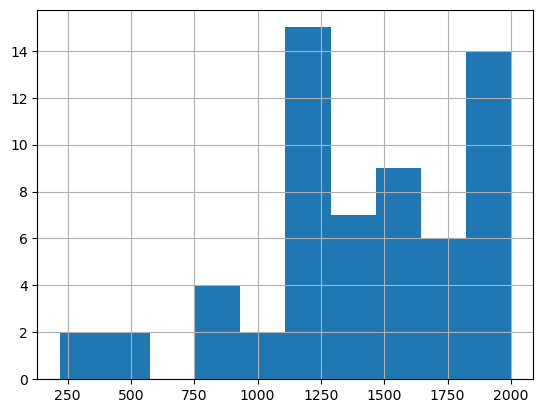

In [34]:
# Histogramm erstellen .. in 10 Bins eingeteilt
apcs["euro"].hist()

<AxesSubplot:>

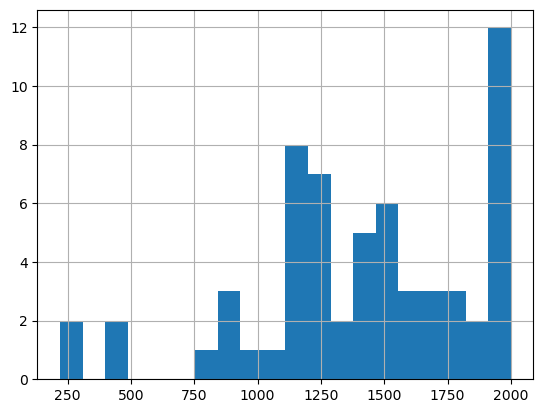

In [35]:
# ... mit Keyword-Parametern
apcs["euro"].hist(bins=20)

<AxesSubplot:>

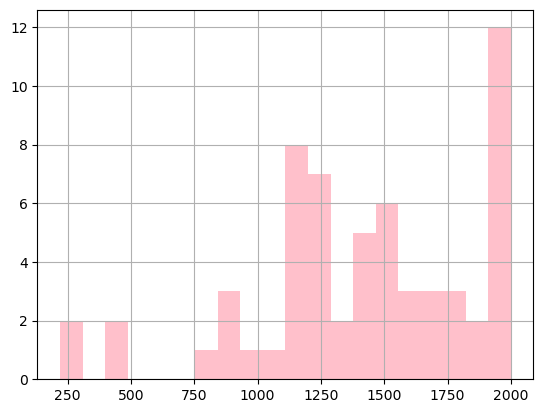

In [38]:
apcs["euro"].hist(bins=20, color="pink")

Help on AxesSubplot in module matplotlib.axes._subplots object:

class AxesSubplot(SubplotBase, matplotlib.axes._axes.Axes)
 |  AxesSubplot(fig, *args, **kwargs)
 |  
 |  Method resolution order:
 |      AxesSubplot
 |      SubplotBase
 |      matplotlib.axes._axes.Axes
 |      matplotlib.axes._base._AxesBase
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __reduce__(self)
 |  
 |  set(self, *, adjustable=<UNSET>, agg_filter=<UNSET>, alpha=<UNSET>, anchor=<UNSET>, animated=<UNSET>, aspect=<UNSET>, autoscale_on=<UNSET>, autoscalex_on=<UNSET>, autoscaley_on=<UNSET>, axes_locator=<UNSET>, axisbelow=<UNSET>, box_aspect=<UNSET>, clip_box=<UNSET>, clip_on=<UNSET>, clip_path=<UNSET>, facecolor=<UNSET>, frame_on=<UNSET>, gid=<UNSET>, in_layout=<UNSET>, label=<UNSET>, navigate=<UNSET>, path_effects=<UNSET>, picker=<UNSET>, position=<UNSET>, prop_cycle=<UNSET>, rasterization_zorder=<UNSET>, rasterized=<UNSET>, sketch_params=<UNSET>, snap=<UNSET>, 

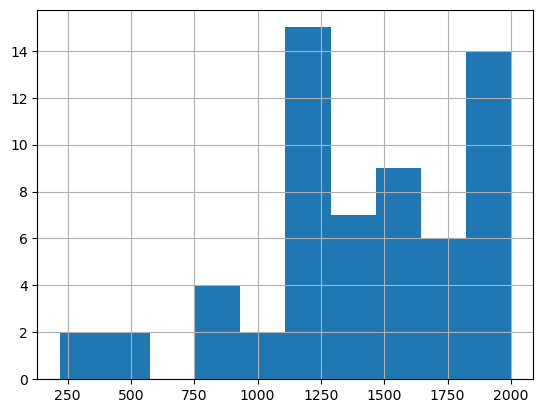

In [40]:
# Hilfe aufrufen zu Funktionen
help(apcs["euro"].hist())

In [41]:
apcs["publisher"]

0                      Springer Nature
1      American Physical Society (APS)
2                      Springer Nature
3     Public Library of Science (PLoS)
4                      Springer Nature
                    ...               
56                     Springer Nature
57                  Frontiers Media SA
58                  Frontiers Media SA
59                     Springer Nature
60      Hindawi Publishing Corporation
Name: publisher, Length: 61, dtype: object

In [42]:
# Zählen der Häufigkeiten von Einträgen (SQL=Count)
apcs["publisher"].value_counts()

Frontiers Media SA                                  16
Springer Nature                                     13
Public Library of Science (PLoS)                    13
Copernicus GmbH                                      3
Schweizerbart                                        3
Hindawi Publishing Corporation                       3
Scientific Research Publishing, Inc,                 2
American Physical Society (APS)                      1
PAGEPress Publications                               1
IOP Publishing                                       1
Elsevier BV                                          1
Inter-Research Science Center                        1
MDPI AG                                              1
Cogitatio                                            1
The Korean Society of Veterinary Science (KAMJE)     1
Name: publisher, dtype: int64

<AxesSubplot:>

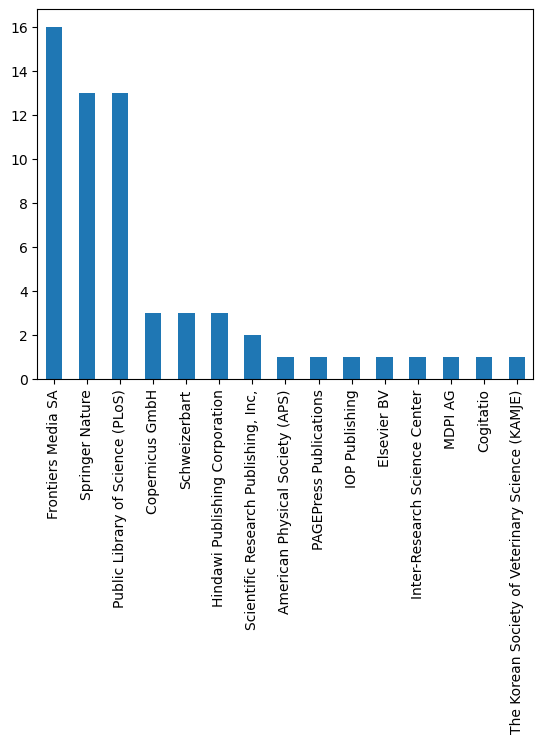

In [43]:
apcs["publisher"].value_counts().plot.bar()

<AxesSubplot:>

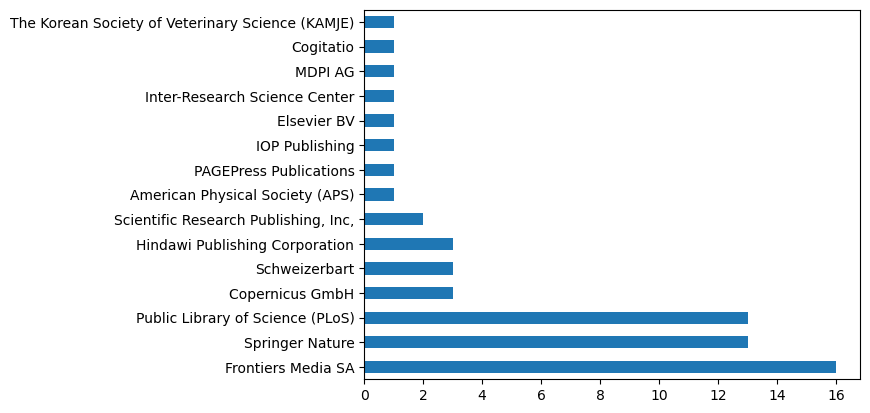

In [44]:
apcs["publisher"].value_counts().plot.barh()

In [45]:
# zwei Spalten ausschneiden in neuen Dataframe
apcs_pub_and_euro = apcs[["publisher", "euro"]]

In [48]:
apcs_pub_and_euro.groupby("publisher").sum()

,euro
publisher,
American Physical Society (APS),1503.12
Cogitatio,430.50
Copernicus GmbH,3272.50
Elsevier BV,1550.33
Frontiers Media SA,21772.15
Hindawi Publishing Corporation,4305.22
IOP Publishing,1392.30
Inter-Research Science Center,1785.00
MDPI AG,1150.00


In [49]:
apcs_pub_and_euro.groupby("publisher").max()

,euro
publisher,
American Physical Society (APS),1503.12
Cogitatio,430.50
Copernicus GmbH,1160.25
Elsevier BV,1550.33
Frontiers Media SA,2000.00
Hindawi Publishing Corporation,2000.00
IOP Publishing,1392.30
Inter-Research Science Center,1785.00
MDPI AG,1150.00
